In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt
from itertools import cycle

# KMEANS

In [2]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

('For n_clusters =', 2, 'The average silhouette_score is :', 0.68081362027879422)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.55259194453090321)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.49782569008681471)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.48851755086545079)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.37121805035291017)


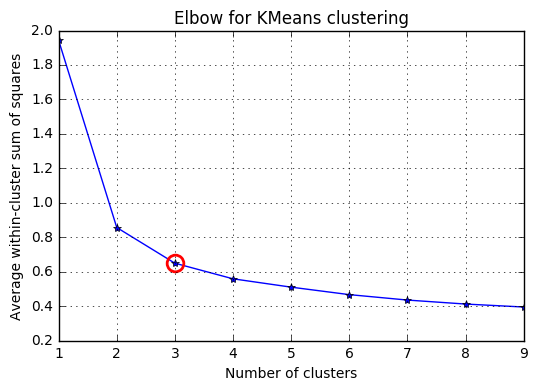

In [3]:
#Predicting K using Silhouette
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
	clusterer = KMeans(n_clusters=n_clusters, random_state=10)
	cluster_labels = clusterer.fit_predict(x)
	silhouette_avg = sm.silhouette_score(x, cluster_labels)
	print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

#Predicting K using Elbow method
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(x) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/x.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(x)**2)/x.shape[0]
bss = tss-wcss

kIdx = 2

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

plt.show()

In [4]:
# Silhouette Score is highest for 2 clusters because Silhouette score is more for better defined & separated clusters.
# And we can notice the elbow at cluster = 3. So, we try num_clusters with 2 and 3. 
# We can observe n_clusters =3 gives a better score for out dataset between n_clusters = 2 and n_clusters =3.
# So, choosing 3.

# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(x)

predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (model.labels_)
print (predY)


# Performance Metrics
print sm.accuracy_score(y, predY)

	
# Confusion Matrix
print sm.confusion_matrix(y, predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
0.44
[[50  0  0]
 [ 0  2 48]
 [ 0 36 14]]


# GMM

In [5]:
from sklearn.mixture import GaussianMixture
iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [6]:
def plot_2D(data, target, target_names):
	colors = cycle('rgbcmykw')
	target_ids = range(len(target_names))
	plt.figure()
	for i, c, label in zip(target_ids, colors, target_names):
		plt.scatter(data[target == i, 0], data[target == i, 1],c=c, label=label)
	plt.legend()
	plt.show()

In [7]:
#using BIC for choosing clusters
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=3,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

predY = best_gmm.predict(X)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


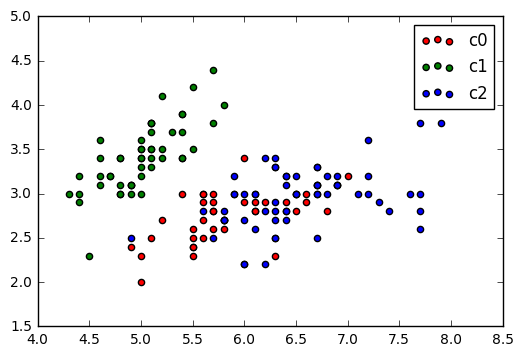

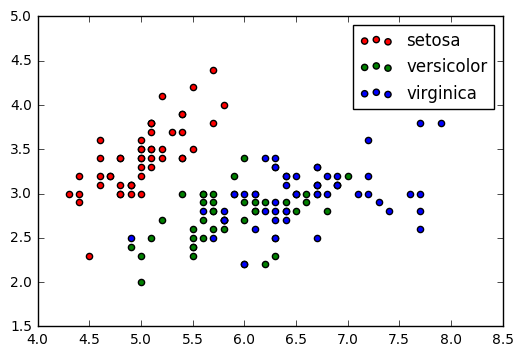

In [8]:
print predY
print Y


plot_2D(X, predY, ["c0", "c1", "c2"])
plot_2D(X, iris.target, iris.target_names)

# Heirarchical

In [14]:
from sklearn.cluster import AgglomerativeClustering  #Hierarchical Clustering which is implemented in scikit-learn as AgglomerativeClustering
iris = datasets.load_iris()

x = iris.data
y = iris.target

In [10]:
#Predicting number of clusters using Silhouette
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
	clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
	cluster_labels = clusterer.fit_predict(x)
	silhouette_avg = sm.silhouette_score(x, cluster_labels)
	print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.68639305432850328)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.55409729079614556)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.48873984907752543)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.48415535260111559)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.36188451501872154)


In [11]:
#Hierarchical Clustering which is implemented in scikit-learn as AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(x)

predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (model.labels_)
print (predY)
print iris.target

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
# Performance Metrics
print sm.accuracy_score(y, predY)

	
# Confusion Matrix
print sm.confusion_matrix(y, predY)

0.893333333333
[[50  0  0]
 [ 0 49  1]
 [ 0 15 35]]


# PCA

In [15]:
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [16]:
#Start PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

print pca.components_

X_pca = pca.transform(X)

import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

np.round(X_pca.std(axis=0), decimals=5)

np.corrcoef(X_pca.T)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


array([[  1.00000000e+00,  -2.18713936e-16],
       [ -2.18713936e-16,   1.00000000e+00]])

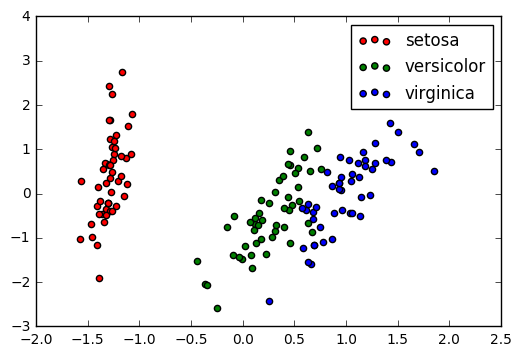

In [17]:
#Plotting graph

colors = cycle('rgbcmykw')
target_ids = range(len(target_names))
plt.figure()
for i, c, label in zip(target_ids, colors, target_names):
	plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],c=c, label=label)
	plt.legend()

plt.show()

# t-SNE

In [19]:
from sklearn.manifold import TSNE
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [20]:
#TSNE
X_tsne = TSNE(n_components = 2, learning_rate=100, random_state=10, verbose=2).fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.511967
[t-SNE] Iteration 25: error = 0.2721277, gradient norm = 0.0068861
[t-SNE] Iteration 50: error = 0.2366496, gradient norm = 0.0051558
[t-SNE] Iteration 75: error = 0.1709086, gradient norm = 0.0015824
[t-SNE] Iteration 100: error = 0.1640166, gradient norm = 0.0013157
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.164017
[t-SNE] Iteration 125: error = 0.1548066, gradient norm = 0.0009228
[t-SNE] Iteration 125: gradient norm 0.000923. Finished.
[t-SNE] Error after 125 iterations: 0.164017


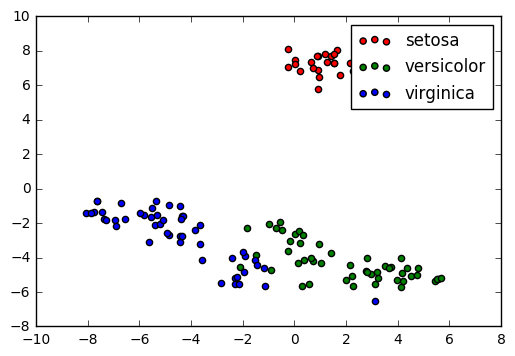

In [21]:
#Plotting the clusters
colors = cycle('rgbcmykw')
target_ids = range(len(target_names))
plt.figure()
for i, c, label in zip(target_ids, colors, target_names):
	plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],c=c, label=label)
	plt.legend()

plt.show()

# Report

In Kmeans and Hierarchical clustering the Silhouette Score is highest for 2 clusters because Silhouette score is more for better defined & separated clusters.
And we can notice the elbow at cluster = 3. So, we try num_clusters with 2 and 3. 
We can observe n_clusters =3 gives a better score for out dataset between n_clusters = 2 and n_clusters =3.
So, choosing 3.

For GMM we used BIC to find the number of clusters. Here also BIC gave number of clusters to be 2. So, we decided to use 3 and see the results, which is quite good as shown above. We have also used the bic score to find the best mixture type.

We got 89% accuracy for both KMeans and Heirarchical Clustering. But GMM seemed to give a better score for the iris dataset. A score of 96% is observed

PCA and t-sne results are also good enough as can be seen above.